## Getting Started with TensorFlow 2.0

### Introduction

In this notebook, we will explore a simple linear regression problem using TensorFlow. Linear regression is a fundamental technique in machine learning where the goal is to model the relationship between a dependent variable \( y \) and one or more independent variables \( X \).

#### Objectives

1. **Generate and Visualize Data**: We will create a synthetic dataset consisting of noisy linear data. This data will be used to train our linear regression model.
2. **Implement a Linear Model**: We will define a custom linear model class using TensorFlow. This class will include methods for computing loss, training the model, and making predictions.
3. **Train the Model**: We will train our linear model on the generated data and monitor the loss to observe how well the model is fitting the data.
4. **Visualize the Results**: Finally, we will plot the original data and the model's predictions to visualize the fit of our linear regression model.

#### Imports

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Print TensorFlow version to verify installation
print(f' tensorflow version:: {tf.__version__}')

 tensorflow version:: 2.17.0


#### Generate Toy Data

In [2]:
# Set random seeds for reproducibility
np.random.seed(42)       # NumPy random seed
tf.random.set_seed(42)   # TensorFlow random seed

In [3]:
# Random linear data: 100 between 0-50
n=100
X = np.linspace(0,50,n)     # Linear range of X values
y = np.linspace(0,50,n)     # Linear range of y values

# Adding noise to random linear data
X += np.random.uniform(-10,10,n)    # Add random noise to X
y += np.random.uniform(-10,10,n)    # Add random noise to y

#### Show the data

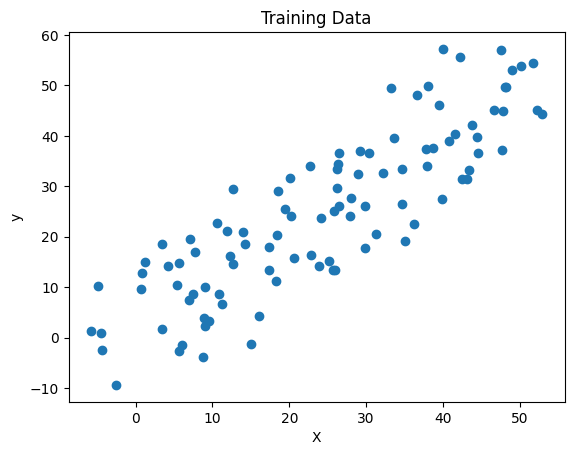

In [4]:
# Plot of the training data and visualize it
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training Data')
plt.show()

#### Linear Regression Model Class

In [5]:
# Define a simple linear model class
class LinearModel:
    def __init__(self):
        # Initialize weight (W) and bias (b) as TensorFlow variables
        self.W = tf.Variable(13.0)      # Initial guess for weight
        self.b = tf.Variable(4.0)       # Initial guess for bias

    def loss(self, y, y_pred):
        # Compute mean squared error loss
        return tf.reduce_mean(tf.square(y-y_pred))
    
    def train(self, X, y, lr=0.0001, epochs=150, verbose=True):
        # Define the training step
        def train_step():
            with tf.GradientTape() as t:
                current_loss = self.loss(y, self.predict(X))

            # Compute gradients of loss with respect to W and b
            dW, db = t.gradient(current_loss, [self.W, self.b])
            
            # Update weight and bias using the computed gradients
            self.W.assign_sub(lr*dW) #W -= lr*dW
            self.b.assign_sub(lr*db)

            return current_loss
                
        # Perform training over a number of epochs
        for epoch in range(epochs):
            current_loss = train_step()     # Perform one training step
            if verbose:
                # Print loss every epoch
                print(f'Epoch:: {epoch}. Loss::{current_loss.numpy()}') #eager execution

    # Predict y values based on input X using the linear model
    def predict(self, X):
        return self.W*X + self.b

#### Using the Model

Epoch:: 0. Loss::124765.109375
Epoch:: 1. Loss::86082.9765625
Epoch:: 2. Loss::59400.33984375
Epoch:: 3. Loss::40994.8515625
Epoch:: 4. Loss::28298.88671875
Epoch:: 5. Loss::19541.3046875
Epoch:: 6. Loss::13500.388671875
Epoch:: 7. Loss::9333.4111328125
Epoch:: 8. Loss::6459.06103515625
Epoch:: 9. Loss::4476.35546875
Epoch:: 10. Loss::3108.700927734375
Epoch:: 11. Loss::2165.302978515625
Epoch:: 12. Loss::1514.5535888671875
Epoch:: 13. Loss::1065.671875
Epoch:: 14. Loss::756.03662109375
Epoch:: 15. Loss::542.452392578125
Epoch:: 16. Loss::395.1237487792969
Epoch:: 17. Loss::293.4975280761719
Epoch:: 18. Loss::223.3964080810547
Epoch:: 19. Loss::175.04122924804688
Epoch:: 20. Loss::141.68617248535156
Epoch:: 21. Loss::118.67814636230469
Epoch:: 22. Loss::102.80734252929688
Epoch:: 23. Loss::91.85980224609375
Epoch:: 24. Loss::84.3082504272461
Epoch:: 25. Loss::79.0992660522461
Epoch:: 26. Loss::75.50613403320312
Epoch:: 27. Loss::73.02761840820312
Epoch:: 28. Loss::71.31796264648438
Epo

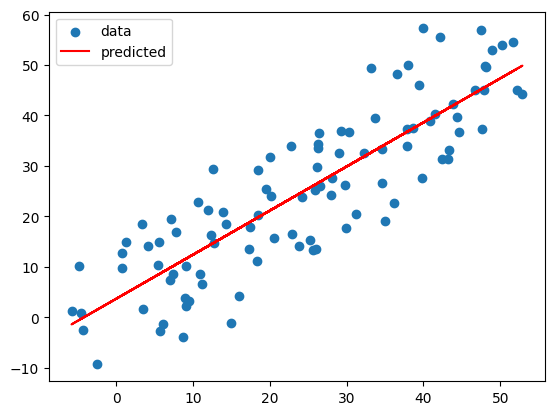

In [6]:
# Instantiate and train the linear model
model = LinearModel()
model.train(X,y)

# Plot the original data and the linear regression line
plt.scatter(X,y, label='data')
plt.plot(X, model.predict(X), 'r-', label='predicted') # Plot the fitted line
plt.legend()    # Show legend
plt.show()      # Display the plot